In [59]:

from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
import pandas as pd
import psycopg2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
iris = datasets.load_iris()

DB_HOST = '52.157.159.24'
DB_USER = 'student16'
DB_USER_PASSWORD = 'student16_password'
DB_NAME = 'sql_ex_for_student16'

conn = sqlite3.connect('student16_hw7.db')  
conn2 = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
c = conn.cursor()



In [33]:
#В sql postgre создаем запрос
# create table table1 as
# Select cast(random()*1000 as int) as one, cast(random()*1000 as int) as two, cast(random()*1000 as int) as three
# FROM generate_series(1,1000);

request = """
select *
from table1
"""
df = pd.read_sql_query(request, conn2)

In [37]:
df.to_sql('table1',conn)
c.execute("SELECT * from table1")
results = c.fetchall()

ValueError: Table 'table1' already exists.

In [62]:
request = "select * from table1"
c.execute(request)
tables = c.fetchall()
df=pd.DataFrame(tables)
del df[0]
df

,1,2,3
0,915,978,962
1,638,811,914
2,540,520,810
3,795,244,488
4,238,994,570
...,...,...,...
995,699,49,847
996,847,333,914
997,871,274,848
998,506,642,153


(array([38., 27., 21., 25., 23., 30., 23., 24., 23., 20., 28., 26., 29.,
        30., 41., 24., 30., 24., 19., 20., 28., 34., 21., 26., 16., 26.,
        30., 44., 29., 26., 31., 26., 29., 37., 33., 39.]),
 array([   0.        ,   27.77777778,   55.55555556,   83.33333333,
         111.11111111,  138.88888889,  166.66666667,  194.44444444,
         222.22222222,  250.        ,  277.77777778,  305.55555556,
         333.33333333,  361.11111111,  388.88888889,  416.66666667,
         444.44444444,  472.22222222,  500.        ,  527.77777778,
         555.55555556,  583.33333333,  611.11111111,  638.88888889,
         666.66666667,  694.44444444,  722.22222222,  750.        ,
         777.77777778,  805.55555556,  833.33333333,  861.11111111,
         888.88888889,  916.66666667,  944.44444444,  972.22222222,
        1000.        ]),
 <BarContainer object of 36 artists>)

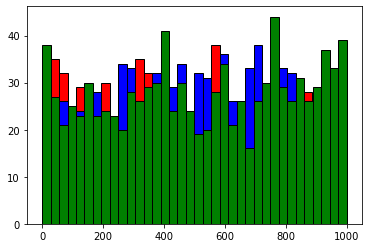

In [68]:
plt.hist(df[1], color = 'red', edgecolor = 'black',
         bins = int(180/5))
plt.hist(df[2], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.hist(df[3], color = 'green', edgecolor = 'black',
         bins = int(180/5))